In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from statsmodels.discrete.discrete_model import Logit
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score


In [110]:
data=pd.read_excel("attrition.xlsx") 

In [111]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [112]:
data.info() #chech for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome          

In [113]:
data_numeric=data.select_dtypes(exclude=['object'])
data_object=data.select_dtypes(include=['object'])

In [114]:
data_numeric.var() #checking for 0 variance

Age                         8.345505e+01
Attrition                   1.353232e-01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EmployeeCount               1.233434e-32
EmployeeNumber              3.624333e+05
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobLevel                    1.225316e+00
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StandardHours               0.000000e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRo

In [115]:
# drop standard hours column, as it has 0 variance (only 1 value=80)  
# and employee count column, as it has alsost 0 variance (only 1 value=1) 
data_numeric= data_numeric.drop(['StandardHours','EmployeeCount'],axis=1) 

In [116]:
#check to see whether there is object variable with one category
for i in data_object:
    print(data_object[i].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research_Development' 'Human_Resources']
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
['Female' 'Male']
['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [117]:
#drop "over 18" column as it has only one value=Y 
data_object= data_object.drop('Over18',axis=1) 

In [118]:
data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)

In [119]:
data_dummies.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_Development,Department_Sales,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,Gender_Male,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [120]:
data=data_numeric.join(data_dummies)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 46 columns):
Age                                 1470 non-null int64
Attrition                           1470 non-null int64
DailyRate                           1470 non-null int64
DistanceFromHome                    1470 non-null int64
Education                           1470 non-null int64
EmployeeNumber                      1470 non-null int64
EnvironmentSatisfaction             1470 non-null int64
HourlyRate                          1470 non-null int64
JobInvolvement                      1470 non-null int64
JobLevel                            1470 non-null int64
JobSatisfaction                     1470 non-null int64
MonthlyIncome                       1470 non-null int64
MonthlyRate                         1470 non-null int64
NumCompaniesWorked                  1470 non-null int64
PercentSalaryHike                   1470 non-null int64
PerformanceRating                   1470 non-null int

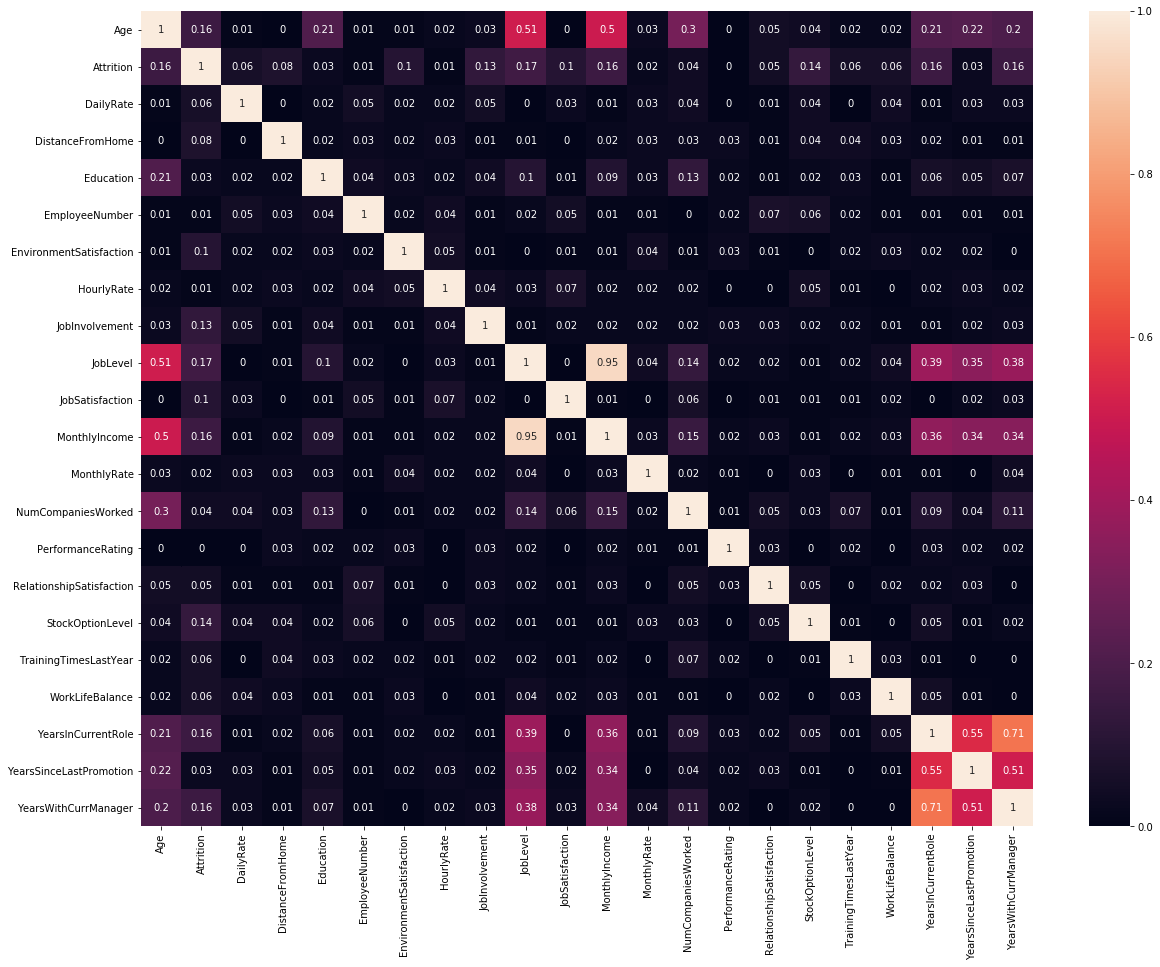

In [173]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [123]:
# we can observe high multicolinearity (higher than 0.75) therefore I'll start dropping one of the high correlated variables

In [124]:
del data_numeric["TotalWorkingYears"] 

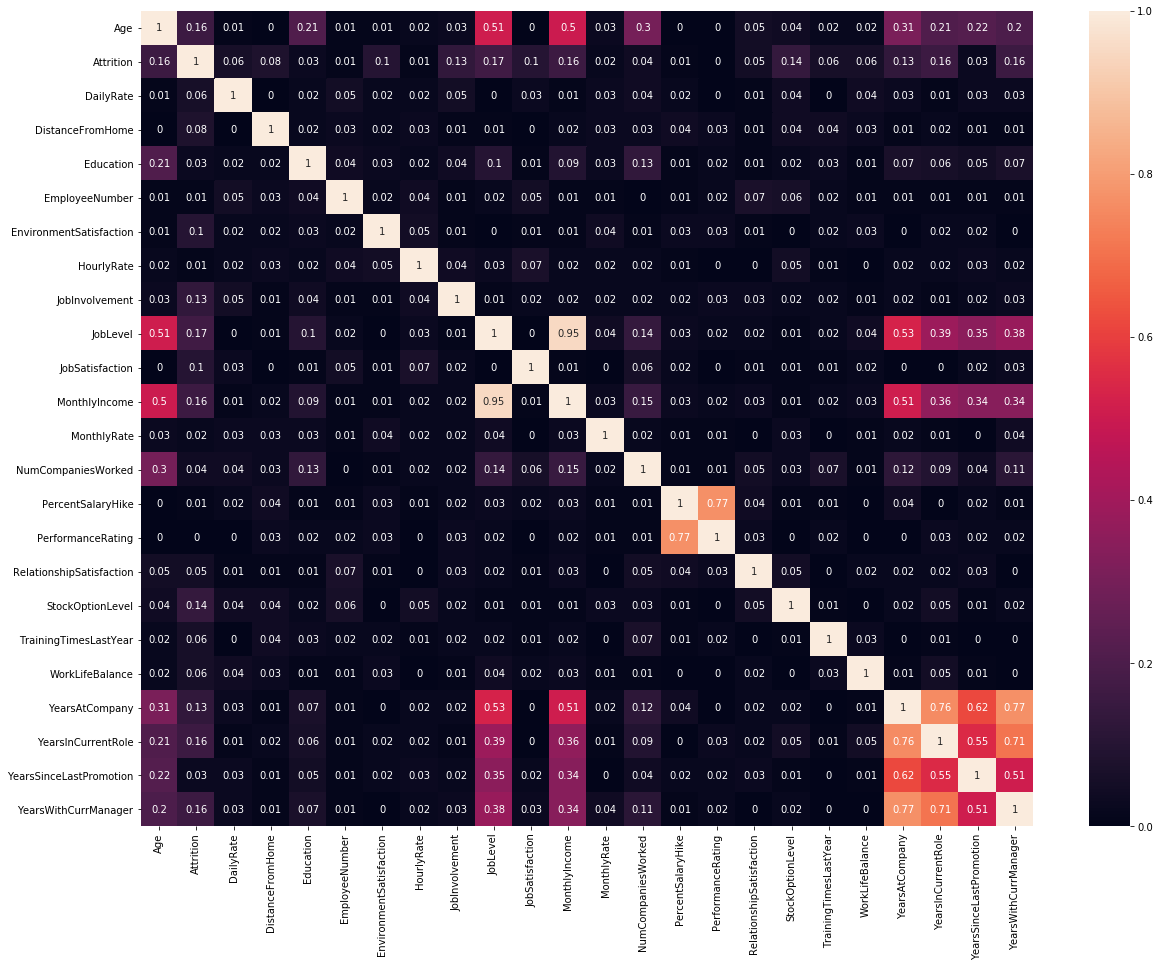

In [125]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [126]:
del data_numeric["PercentSalaryHike"]

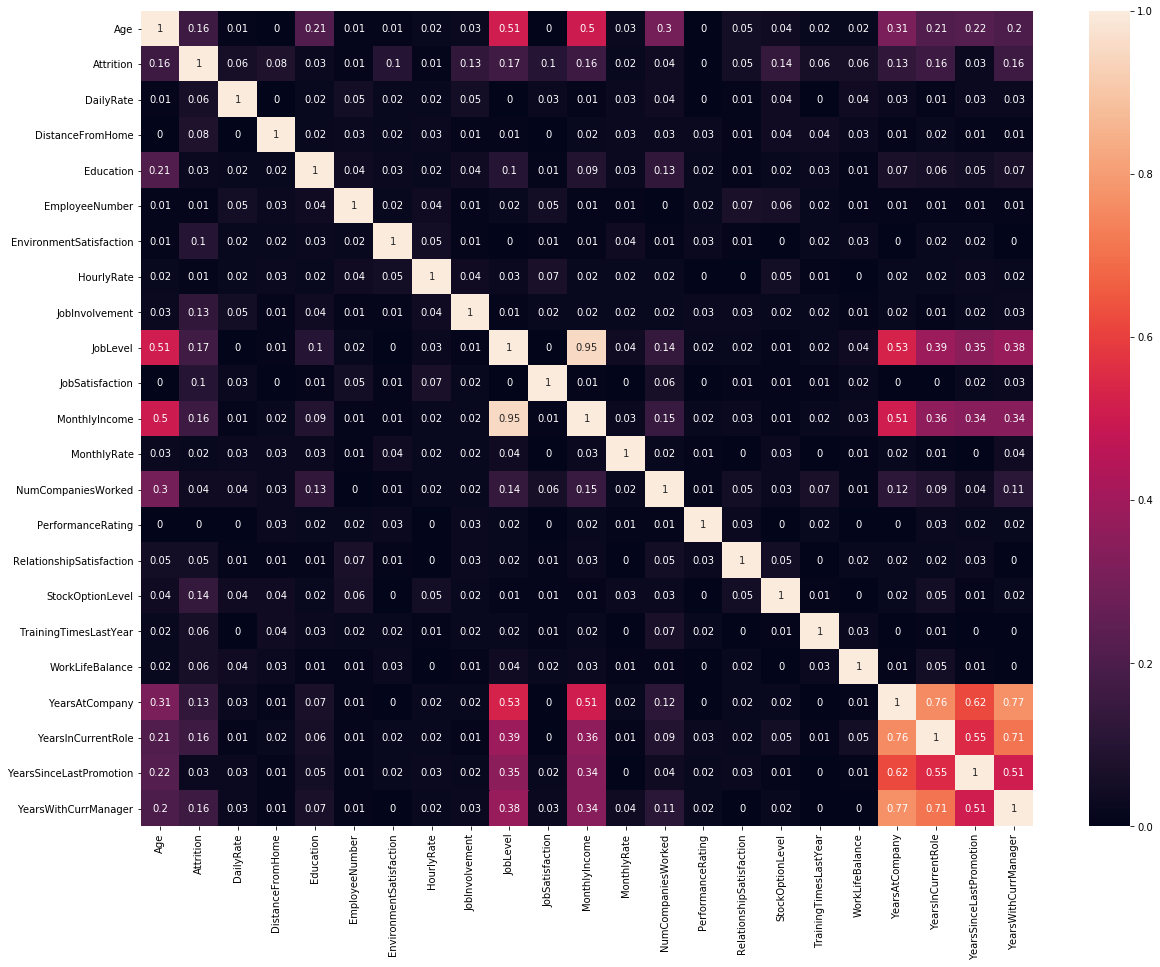

In [127]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [128]:
del data_numeric["YearsAtCompany"]

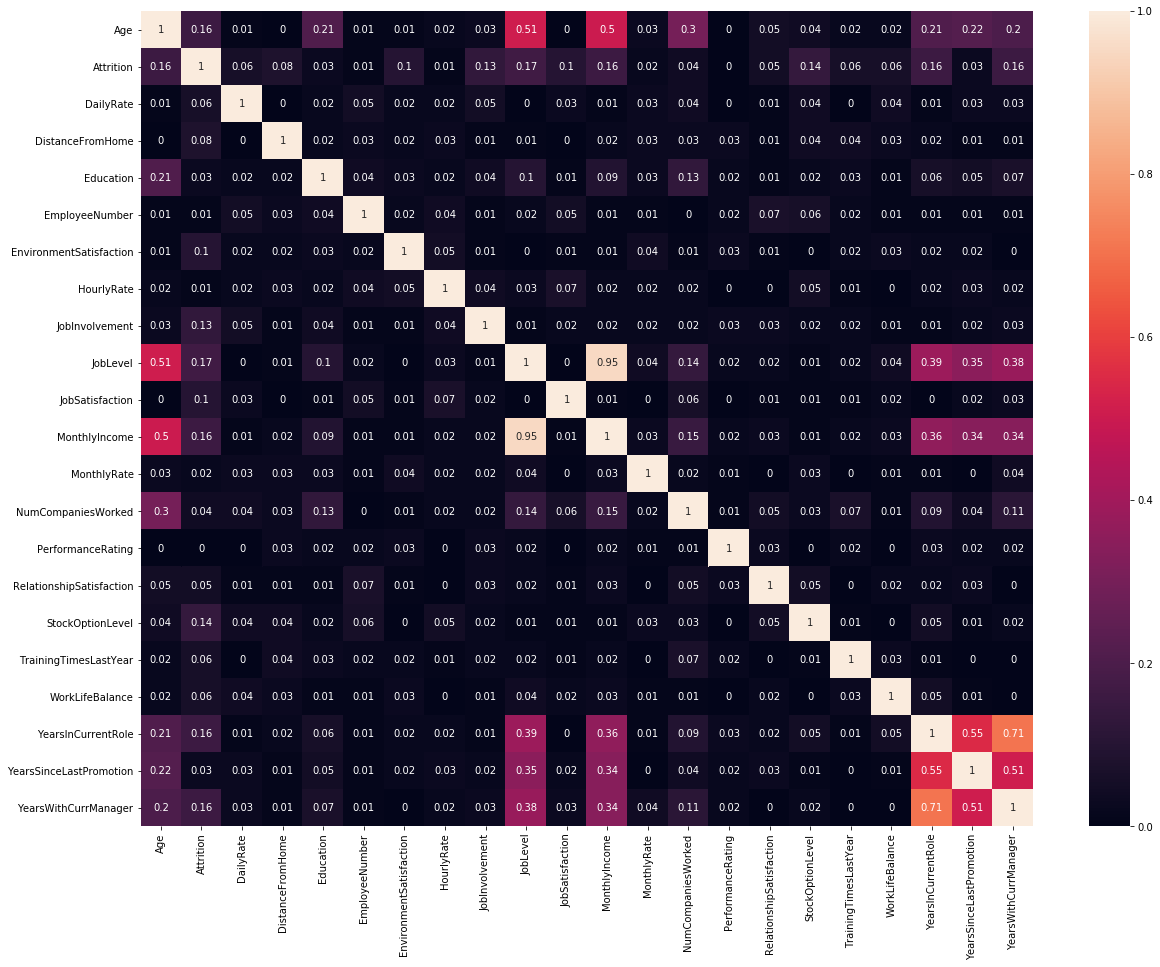

In [129]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_numeric.corr().abs().round(2), annot=True)
plt.show()

In [130]:
# 1=Yes, 0=No
data.Attrition.value_counts()/len(data)*100

0    83.877551
1    16.122449
Name: Attrition, dtype: float64

In [131]:
#84% is the benchmark; if we sat that there is no churn, we will be 84% correct

# Logistic Regression

In [132]:
X=data.drop("Attrition",axis=1)
Y=data.Attrition
Y_train, Y_test, X_train, X_test=train_test_split(Y,X,test_size=0.25, random_state=42)

In [133]:
formula="Attrition~"+"+".join(X.columns.tolist())
formula

'Attrition~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobLevel+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PercentSalaryHike+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TotalWorkingYears+TrainingTimesLastYear+WorkLifeBalance+YearsAtCompany+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_Research_Development+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [134]:
logit=Logit.from_formula(formula=formula, data=data).fit()

         Current function value: 0.291829
         Iterations: 35


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [135]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1424
Method:                           MLE   Df Model:                           45
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                  0.3393
Time:                        16:51:18   Log-Likelihood:                -428.99
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 2.321e-66
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -14.5512   5022.293     -0.003      0.998   -9858.065    9828.962
Age                                 -0.0315      0.014     -2.320      0.020      -0.058      -0.005
DailyRate                           -0.0003      0.000     -1.290      0.197      -0.001       0.000
DistanceFromHome                     0.0459      0.011      4.250      0.000       0.025       0.067
Education                            0.0115      0.088      0.130      0.896      -0.161       0.184
EmployeeNumber                      -0.0002      0.000     -1.015      0.310      -0.000       0.000
EnvironmentSatisfaction             -0.4341      0.083     -5.229      0.000      -0.597      -0.271
HourlyRate                           0.0012      0.004      0.262      0.793      -0.007       0.010
JobInvolvement                      -0.5269      0.123     -4.294      0.000      -0.767      -0.286
JobLevel                            -0.0938      0.316     -0.296      0.767      -0.714       0.526
JobSatisfaction                     -0.4143      0.082     -5.082      0.000      -0.574      -0.255
MonthlyIncome                     1.347e-05   8.15e-05      0.165      0.869      -0.000       0.000
MonthlyRate                       5.612e-06   1.25e-05      0.448      0.654    -1.9e-05    3.02e-05
NumCompaniesWorked                   0.1945      0.039      5.008      0.000       0.118       0.271
PercentSalaryHike                   -0.0233      0.039     -0.592      0.554      -0.100       0.054
PerformanceRating                    0.1165      0.399      0.292      0.770      -0.666       0.899
RelationshipSatisfaction            -0.2654      0.083     -3.201      0.001      -0.428      -0.103
StockOptionLevel                    -0.1930      0.159     -1.216      0.224      -0.504       0.118
TotalWorkingYears                   -0.0599      0.029     -2.042      0.041      -0.117      -0.002
TrainingTimesLastYear               -0.1884      0.073     -2.576      0.010      -0.332      -0.045
WorkLifeBalance                     -0.3725      0.124     -2.999      0.003      -0.616      -0.129
YearsAtCompany                       0.0961      0.039      2.470      0.014       0.020       0.172
YearsInCurrentRole                  -0.1513      0.046     -3.323      0.001      -0.241      -0.062
YearsSinceLastPromotion              0.1735      0.042      4.090      0.000       0.090       0.257
YearsWithCurrManager                -0.1367      0.047     -2.907      0.004      -0.229      -0.045
BusinessTravel_Travel_Frequently     1.9092      0.412      4.635      0.000       1.102       2.716
BusinessTravel_Travel_Rarely         1.0269      0.380      2.704      0.007       0.282       1.771
Department_Research_Development     16.8851   5022.293      0.003      0.997   -9826.628    9860.398
Department_Sales                    16.7479   5022.293      0.003      0.997   -9826.765    9860.261
Education

In [136]:
logit_sk=LogisticRegression()

In [137]:
logit_sk=logit_sk.fit(X_train,Y_train)

In [138]:
logit_sk.score(X_train, Y_train)

0.8901996370235935

In [139]:
logit_sk.score(X_test,Y_test)

0.8885869565217391

In [140]:
# accurate by 89%, 89% right predictions of Y

# Decision Tree

In [141]:
tree_1=DecisionTreeClassifier(random_state=42)

In [142]:
tree_1=tree_1.fit(X_train, Y_train)

In [143]:
tree_1.score(X_train, Y_train)

1.0

In [144]:
tree_1.score(X_test,Y_test)

0.8152173913043478

In [145]:
#bad because lower than benchmark

In [146]:
tree_gr=export_graphviz(tree_1,out_file="tree1.doc",class_names=True,feature_names=X.columns,filled=True)

In [147]:
tree_2=DecisionTreeClassifier(max_depth=7,random_state=42,min_samples_leaf=100)

In [148]:
tree_2=tree_2.fit(X_train, Y_train)

In [149]:
tree_2.score(X_train, Y_train)

0.8448275862068966

In [150]:
tree_2.score(X_test,Y_test)

0.8532608695652174

In [151]:
# better model because score improved and became higher than benchmark

In [152]:
importances=tree_1.feature_importances_
importances=pd.DataFrame(data=importances, index=X.columns, columns=['importances'])

In [153]:
importances.sort_values(by="importances", ascending=False)

,importances
MonthlyIncome,0.139145
OverTime_Yes,0.075114
Age,0.070617
EmployeeNumber,0.058297
NumCompaniesWorked,0.054997
DistanceFromHome,0.052492
TotalWorkingYears,0.052356
HourlyRate,0.048469
DailyRate,0.042001
MonthlyRate,0.041892


In [154]:
importances=tree_2.feature_importances_
importances=pd.DataFrame(data=importances, index=X.columns, columns=['importances'])

In [155]:
importances.sort_values(by="importances", ascending=False)

,importances
OverTime_Yes,0.392755
MonthlyIncome,0.370206
YearsAtCompany,0.129628
StockOptionLevel,0.040635
YearsInCurrentRole,0.035072
TrainingTimesLastYear,0.019806
EmployeeNumber,0.007788
HourlyRate,0.003391
NumCompaniesWorked,0.000717
JobRole_Human_Resources,0.000000


# GridSearch

In [165]:
param_grid = {"max_depth": range(1,20), "min_samples_leaf":range(50,200,5)}

In [166]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)

In [167]:
tree.fit(X_train, Y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(Y_test, tree_preds)

In [168]:
print(tree.best_params_)

{'max_depth': 3, 'min_samples_leaf': 50}


In [169]:
tree_3=DecisionTreeClassifier(max_depth=3,random_state=42,min_samples_leaf=50)
tree_3=tree_3.fit(X_train, Y_train)
tree_3.score(X_train, Y_train)


0.8566243194192378

In [170]:
tree_3.score(X_test,Y_test)

0.8586956521739131